In [1]:
import numpy as np
from sklearn import datasets, linear_model, metrics
 
###############################################################################
## Load the diabetes dataset
 
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data # matrix of dimensions 442x10
 
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
 
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [2]:
###############################################################################
## Scikit learn
 
# Create linear regression object
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)
 
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
 
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
mean_squared_error = metrics.mean_squared_error(diabetes_y_test, diabetes_y_pred)
print("Mean squared error: %.2f" % mean_squared_error)
print("="*100)

Coefficients: 
 [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
Mean squared error: 2004.57


In [3]:
X = diabetes_X_train
y = diabetes_y_train

# initialize weights and biases
W = np.random.uniform(high=0.1, low=0.01, size=diabetes_X.shape[1])  # ----> same shape as the number of features
b = 0.001

# learning rate and epoch
learning_rate = 0.25
epoch = 50000

#store costs
costs = []

num = 1.0/(2*len(diabetes_X_train))

# training gradient descent
for i in range(epoch):
    
    # prediction
    y_pred = X.dot(W) + b
    
    # error
    error = y_pred - y
    
    # error metric to minimize
    mse = np.mean(np.power(error, 2))
    costs.append(mse)
    
    # gradient calculation
    W_gradient = num * error.dot(X)
    b_gradient = num * np.sum(error)
    
    # update weights and bias
    W -= learning_rate*W_gradient
    b -= learning_rate*b_gradient
    
print("Final bias and weights are {} and {}".format(b, W))

Final bias and weights are 152.72548607805496 and [   4.00541107 -234.50432786  520.43456576  325.70486544 -127.12027395
  -59.71419862 -196.78255848  110.43791401  482.05091172   79.09324019]


In [4]:
print(costs[-1])

2920.3530567356884


In [5]:
X_test = diabetes_X_test
y_test = diabetes_y_test
 
y_predict = X_test.dot(W) + b
error = y_predict - y_test
mean_squared_error = np.mean(np.power(error, 2))
print("Mean squared error: %.2f" % mean_squared_error)
print("="*120)

Mean squared error: 1993.15


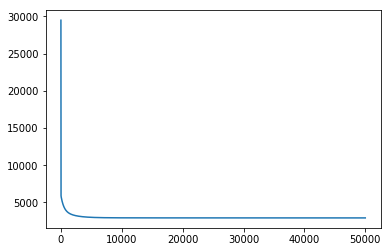

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epoch), costs)
plt.show()